In [1]:
import pandas as pd

data = pd.read_excel("after_extration_data.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          480 non-null    int64  
 1   FemaleLaborParticipationRate  480 non-null    float64
 2   AvgHoursWorked                480 non-null    float64
 3   FirstBirthAge                 480 non-null    float64
 4   MarriageRate                  480 non-null    float64
 5   EmploymentRate                480 non-null    float64
 6   UnemploymentRate              480 non-null    float64
 7   HousingPrice                  480 non-null    float64
 8   InterestRate                  480 non-null    float64
 9   PartTimeRate                  480 non-null    float64
 10  FamilyExpenditure             480 non-null    float64
 11  UnemploymentExpenditure       480 non-null    float64
 12  GDI                           480 non-null    float64
 13  GDP  

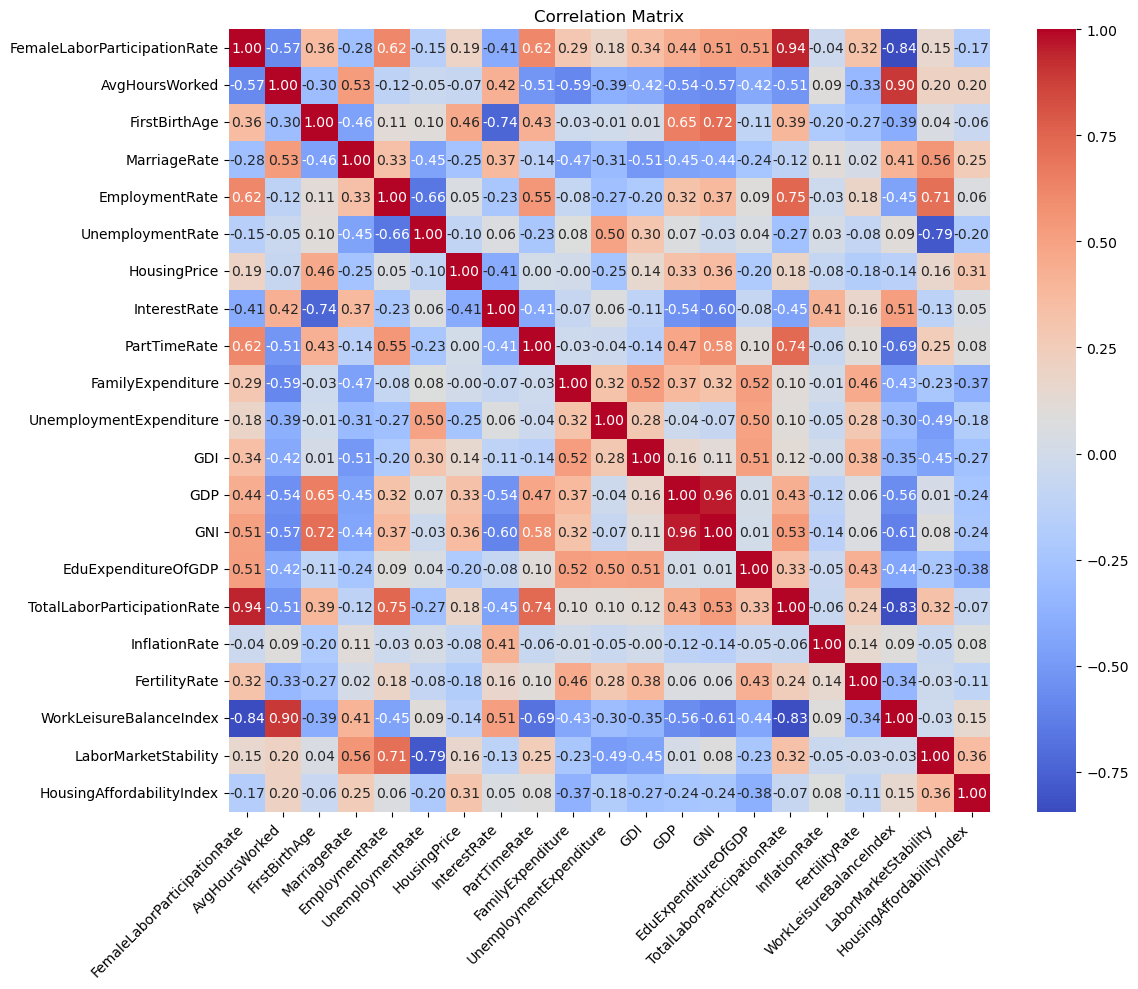

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_ = data.drop(columns='Year')
corr_matrix = data_.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

X = data.drop(['Year', 'FertilityRate'], axis=1)
y = data['FertilityRate']

models = {
    'RandomForestRegressor': RandomForestRegressor(random_state=0),
    'XGBRegressor': XGBRegressor(random_state=0),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=0)
}

feature_rankings = pd.DataFrame()

for model_name, model in models.items():
    rfecv = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error')
    rfecv.fit(X, y)
    
    ranking_df = pd.DataFrame({
        'Feature': X.columns,
        f'Ranking_{model_name}': rfecv.ranking_
    })
    
    if feature_rankings.empty:
        feature_rankings = ranking_df
    else:
        feature_rankings = feature_rankings.merge(ranking_df, on='Feature')

feature_rankings = feature_rankings.sort_values(by='Ranking_RandomForestRegressor')

feature_rankings

,Feature,Ranking_RandomForestRegressor,Ranking_XGBRegressor,Ranking_DecisionTreeRegressor
0,FemaleLaborParticipationRate,1,1,1
17,WorkLeisureBalanceIndex,1,4,8
15,TotalLaborParticipationRate,1,1,4
14,EduExpenditureOfGDP,1,1,1
12,GDP,1,1,1
11,GDI,1,1,1
10,UnemploymentExpenditure,1,1,1
18,LaborMarketStability,1,3,6
9,FamilyExpenditure,1,1,1
7,InterestRate,1,7,2


## 다양한 모델에서 중요도가 낮은 순위를 보이는 상관 관계 높은 Features

- GNI, WorkLeisureBalanceIndex

## 변수 제거

In [7]:
data = data.drop(columns=['GNI'],axis=1)

In [8]:
data = data.drop(columns=['WorkLeisureBalanceIndex'],axis=1)

In [9]:
data.to_excel("Final_Data.xlsx", index=False)